In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from textwrap import wrap

In [2]:
df=pd.read_csv('C:\\Users\HOME\Downloads\SalesRecords.csv')

In [3]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11-07-2011,185941302,12-08-2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12-09-2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,04-10-2010,161442649,05-12-2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,H,08-01-2011,590768182,09-07-2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,05-12-2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,L,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
 14  month           1000 non-null   int32  
 15  year            1000 non-null   int32  
dtypes: float64(5), int32(2), int64(2), object(7)
memory usage: 117.3+ KB


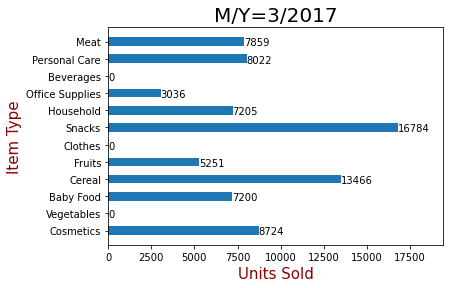

In [5]:
#GRAPH NO-01
#Number of Units sold of each item type in a particular month and in a specific year.
df['month']=df['Order Date'].str[0:2]
df['month']
df['month'] = df['month'].replace("/","", regex=True)
df['month']=df['month'].astype('int')


df['year']=df['Order Date'].str[-4:]
df['year']=df['year'].astype('int')


df.info()

month_unique=df['month'].unique()
year_unique=df['year'].unique()
item_type_unique=df['Item Type'].unique()

dict6={}
total=0
for i in item_type_unique:
    total=0
    for j in range(1000):
        if df.loc[j]['month']==3 and df.loc[j]['year']==2017 and df.loc[j]['Item Type']==i:
            total+=df.loc[j]['Units Sold']
    dict6[i]=total
            
dict6        

key=list(dict6.keys())
val=list(dict6.values())

x=np.array(key)
y=np.array(val)


#fig=plt.figure(figsize=(0.5,0.5))
#axl=plt.subplot(1,1,1)

font1 = {'family':'sans-serif','color':'black','size':20} #html fonts
font2 = {'family':'sans-serif','color':'darkred','size':15} #html fonts

plt.barh(x,y,height=0.5)
plt.xlabel("Units Sold",fontdict=font2)
plt.ylabel("Item Type",fontdict=font2)
plt.title("M/Y=3/2017",fontdict=font1)


for i in range(len(key)):
    plt.text(val[i],i,val[i],va='center_baseline')

scale_factor = 1.1

xmin, xmax = plt.xlim()

plt.xlim(xmin * scale_factor, xmax * scale_factor)

plt.show()

In [6]:
#count of each country from the .csv file
country_list=df["Country"]

country_list_unique=df["Country"].unique()

dict1={}

count=0


for i in country_list_unique:
    count=0
    for j in country_list:
        if i==j:
            count+=1
    dict1[i]=count

dict1

{'Libya': 6,
 'Canada': 3,
 'Japan': 8,
 'Chad': 7,
 'Armenia': 5,
 'Eritrea': 3,
 'Montenegro': 7,
 'Jamaica': 3,
 'Fiji': 9,
 'Togo': 2,
 'Greece': 6,
 'Sudan': 8,
 'Maldives': 7,
 'Estonia': 8,
 'Greenland': 8,
 'Cape Verde': 6,
 'Senegal': 5,
 'Federated States of Micronesia': 2,
 'Bulgaria': 7,
 'Algeria': 5,
 'Mongolia': 9,
 'Grenada': 5,
 'Mauritius ': 6,
 'Morocco': 5,
 'Honduras': 4,
 'Benin': 8,
 'Equatorial Guinea': 5,
 'Swaziland': 8,
 'Trinidad and Tobago': 5,
 'Sweden': 7,
 'Belarus': 9,
 'Guinea-Bissau': 7,
 'Turkey': 8,
 'Central African Republic': 7,
 'Laos': 4,
 'Israel': 7,
 'Bhutan': 6,
 'Vanuatu': 9,
 'Burundi': 6,
 'Ukraine': 5,
 'Croatia': 3,
 'Madagascar': 5,
 'Malaysia': 10,
 'Uzbekistan': 5,
 'Italy': 6,
 'Nepal': 4,
 'Portugal': 6,
 'Panama': 6,
 'Botswana': 3,
 'Tanzania': 4,
 'Romania': 8,
 'Mali': 8,
 'Niger': 9,
 'Austria': 6,
 'India': 5,
 'Luxembourg': 7,
 'Iceland': 5,
 'Qatar': 8,
 'South Sudan': 8,
 'United Kingdom': 5,
 'Tunisia ': 8,
 'United State

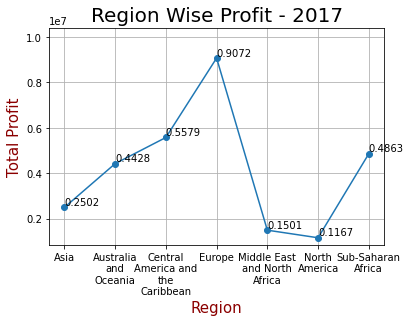

In [7]:
#GRAPH NO-02
#Region Wise Profit - 2017
Region_list=df["Region"]

Region_list_unique=df["Region"].unique()

dict2={}


for i in Region_list_unique:
    count=0
    for j in Region_list:
        if i==j:
            count+=1
    dict2[i]=count

dict2

Region_list_unique=np.sort(Region_list_unique)
Region_list_unique

dict9={}

for i in Region_list_unique:
    total=0
    for j in range(1000):
        if df.loc[j]['year']==2017 and df.loc[j]['Region']==i:
            total+=df.loc[j]['Total Profit']
    dict9[i]=total

dict9
    
key=list(dict9.keys())
key
val=list(dict9.values())
val
vals=[]
for i in val:
    a=i/(10**7)
    a=round(a,4)
    vals.append(a)

keys=['\n'.join(wrap(i,12)) for i in key]
keys[1]='Australia\nand\nOceania'

font1 = {'family':'sans-serif','color':'black','size':20} #html fonts
font2 = {'family':'sans-serif','color':'darkred','size':15} #html fonts

plt.plot(keys,val,"o-")#displays line chart with all the points marked


plt.xlabel("Region",fontdict=font2)
plt.ylabel("Total Profit",fontdict=font2)
plt.title("Region Wise Profit - 2017",fontdict=font1)



for i in range(len(key)):
    plt.text(i,val[i],vals[i],va='bottom',ha='left')

scale_factor = 1.1

ymin, ymax = plt.ylim()

plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.grid()

plt.show()        

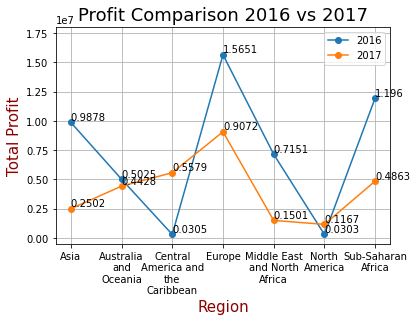

In [8]:
#GRAPH NO-03
#Profit Comparison 2016 vs 2017
Region_list=df["Region"]

Region_list_unique=df["Region"].unique()

dict2={}


for i in Region_list_unique:
    count=0
    for j in Region_list:
        if i==j:
            count+=1
    dict2[i]=count

dict2

Region_list_unique=np.sort(Region_list_unique)
Region_list_unique

dict10={}
dict11={}

for i in Region_list_unique:
    total=0
    for j in range(1000):
        if df.loc[j]['year']==2016 and df.loc[j]['Region']==i:
            total+=df.loc[j]['Total Profit']
    dict10[i]=total

for i in Region_list_unique:
    total=0
    for j in range(1000):
        if df.loc[j]['year']==2017 and df.loc[j]['Region']==i:
            total+=df.loc[j]['Total Profit']
    dict11[i]=total

    


key1=list(dict10.keys())
key1
val1=list(dict10.values())
val1
vals1=[]
for i in val1:
    a=i/(10**7)
    a=round(a,4)
    vals1.append(a)

keys1=['\n'.join(wrap(i,12)) for i in key]
keys1[1]='Australia\nand\nOceania'
    

key2=list(dict11.keys())
key2
val2=list(dict11.values())
val2
vals2=[]
for i in val2:
    a=i/(10**7)
    a=round(a,4)
    vals2.append(a)

keys2=['\n'.join(wrap(i,12)) for i in key]
keys2[1]='Australia\nand\nOceania'


font1 = {'family':'sans-serif','color':'black','size':18} #html fonts
font2 = {'family':'sans-serif','color':'darkred','size':15} #html fonts

keys1
keys2
val1
val2

plt.plot(keys1,val1,'o-')#displays line chart with all the points marked
plt.plot(keys2,val2,'o-')

plt.xlabel("Region",fontdict=font2)
plt.ylabel("Total Profit",fontdict=font2)
plt.title("Profit Comparison 2016 vs 2017",fontdict=font1)



for i in range(len(key1)):
    plt.text(i,val1[i],vals1[i],va='bottom',ha='left')



for i in range(len(key2)):
    plt.text(i,val2[i],vals2[i],va='bottom',ha='left')


scale_factor = 1.1

ymin, ymax = plt.ylim()

plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.legend(["2016","2017"])

plt.grid()

plt.show()       

In [9]:
#count of item types from the .csv file
item_list=df["Item Type"]

item_list_unique=df["Item Type"].unique()

dict3={}


for i in item_list_unique:
    count=0
    for j in item_list:
        if i==j:
            count+=1
    dict3[i]=count

dict3

{'Cosmetics': 75,
 'Vegetables': 97,
 'Baby Food': 87,
 'Cereal': 79,
 'Fruits': 70,
 'Clothes': 78,
 'Snacks': 82,
 'Household': 77,
 'Office Supplies': 89,
 'Beverages': 101,
 'Personal Care': 87,
 'Meat': 78}

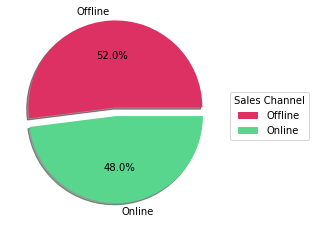

In [10]:
#GRAPH NO-04
#Majority sale from which sales channel after evaluating whole data
#count of sales channel type from the .csv file
sales_channel_list=df["Sales Channel"]

sales_channel_list_unique=df["Sales Channel"].unique()

dict4={}


for i in sales_channel_list_unique:
    count=0
    for j in sales_channel_list:
        if i==j:
            count+=1
    dict4[i]=count

dict4

key=list(dict4.keys())
val=list(dict4.values())

plt.pie(val, labels=key ,explode =[0.1,0], shadow = True, autopct='%1.1f%%',colors=['#DE3163','#58D68D'])

plt.legend(title="Sales Channel",loc="center left",bbox_to_anchor=(1,0.5))
plt.show()

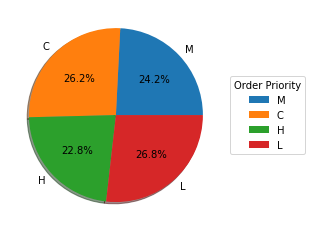

In [11]:
#GRAPH NO-05
#Order priority share after evaluating the whole data
#count of order priority types from the .csv file
order_priority_list=df["Order Priority"]

order_priority_list_unique=df["Order Priority"].unique()

dict5={}


for i in order_priority_list_unique:
    count=0
    for j in order_priority_list:
        if i==j:
            count+=1
    dict5[i]=count

dict5

key=list(dict5.keys())
val=list(dict5.values())


plt.pie(val, labels=key , shadow = True, autopct='%1.1f%%')

plt.legend(title="Order Priority",loc="center left",bbox_to_anchor=(1,0.5))
plt.show()

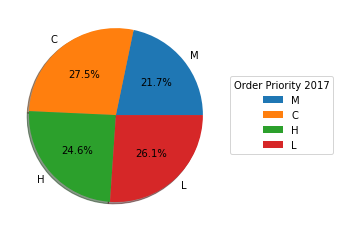

In [12]:
#GRAPH N0-06
#Order priority share in a particular year
order_priority_list=df["Order Priority"]

order_priority_list_unique=df["Order Priority"].unique()

dict12={}


for i in order_priority_list_unique:
    count=0
    for j in range(1000):
        if df.loc[j]['year']==2017 and df.loc[j]['Order Priority']==i:
            count+=1
    dict12[i]=count

dict12

key=list(dict12.keys())
val=list(dict12.values())


plt.pie(val, labels=key , shadow = True, autopct='%1.1f%%')

plt.legend(title="Order Priority 2017",loc="center left",bbox_to_anchor=(1,0.5))
plt.show()

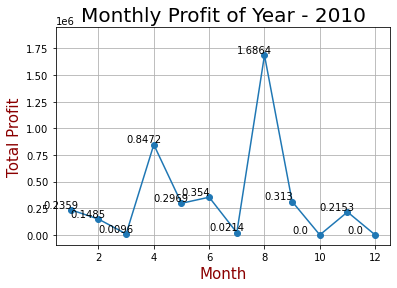

In [13]:
#GRAPH-07
#Monthly Profit of Year - 2010
#title=year(fix) , x-month , y-profit
#for a particular year sales profit for the 12-month.
dict7={}
total=0

month_unique=np.sort(month_unique)

for i in month_unique:
    total=0
    for j in range(100):
        if df.loc[j]['month']==i and df.loc[j]['year']==2010 :
            total+=df.loc[j]['Total Profit']
    dict7[i]=total
            
dict7
key=list(dict7.keys())
val=list(dict7.values())

vals=[]
for i in val:
    a=i/(10**6)
    a=round(a,4)
    vals.append(a)


font1 = {'family':'sans-serif','color':'black','size':20} #html fonts
font2 = {'family':'sans-serif','color':'darkred','size':15} #html fonts

plt.plot(key,val,"o-")#displays line chart with all the points marked
plt.xlabel("Month",fontdict=font2)
plt.ylabel("Total Profit",fontdict=font2)
plt.title("Monthly Profit of Year - 2010",fontdict=font1)



for i in range(len(key)):
    plt.text(i,val[i],vals[i],va='bottom',ha='left')

scale_factor = 1.1

ymin, ymax = plt.ylim()

plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.grid()

plt.show()

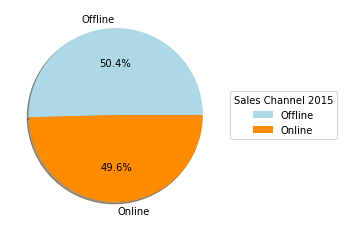

In [14]:
#GRAPH-08
#online and offline presence in the market for a particular year
channel_unique=df['Sales Channel'].unique()
dict8={}
for i in channel_unique:
    count=0
    for j in range(1000):
        if df.loc[j]['year']==2015 and df.loc[j]['Sales Channel']==i:
            count+=1
    dict8[i]=count

dict8          


key=list(dict8.keys())
val=list(dict8.values())



plt.pie(val, labels=key , shadow = True, autopct='%1.1f%%',colors=["lightblue","darkorange"])

plt.legend(title="Sales Channel 2015",loc="center left",bbox_to_anchor=(1,0.5))
plt.show()
